In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [3]:
df = pd.read_csv('/Users/celty/Desktop/midterm_data.csv')


In [4]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


Device: 5000-4900=100 missing data, 2% missing data.
Location: 5000-4970=30 missing data, 0.6% missing data.
Collectively 2.6% missing data, which indicates that the percentage of the missing data is small enough to be directly dropped.

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4871 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4871 non-null   int64  
 1   age              4871 non-null   int64  
 2   sessions         4871 non-null   int64  
 3   time_spent       4871 non-null   float64
 4   pages_visited    4871 non-null   int64  
 5   cart_items       4871 non-null   int64  
 6   cart_value       4871 non-null   float64
 7   checkout_status  4871 non-null   int64  
 8   device           4871 non-null   object 
 9   location         4871 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 418.6+ KB


In [8]:
check_na=df.isnull().any().any()
if check_na:
    print('True')
else:
    print('False')

#No N/A data exists.

False


In [9]:
check_dp=df.duplicated().any().any()
if check_dp:
    print('True')
else:
    print('False')

#Duplicates checked.


False


In [10]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,4871.000000,4871.00000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871,4871
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2522,1028
mean,2503.251488,41.53295,5.023609,25.172038,5.777458,14.971258,149.459444,0.273455,NaN,NaN
std,1445.707937,14.04452,2.589914,9.821864,2.566198,6.054916,68.811486,0.445778,NaN,NaN
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1251.500000,29.00000,3.000000,18.298029,4.000000,10.000000,92.415000,0.000000,NaN,NaN
50%,2505.000000,42.00000,5.000000,25.054759,6.000000,15.000000,143.020000,0.000000,NaN,NaN
75%,3760.500000,54.00000,7.000000,31.991099,8.000000,20.000000,198.550000,1.000000,NaN,NaN


Age: Ranging from 18-65, seems normal values, with the mean of 41 years old.
Check out status: Ranging form 0 to 1, which seems normal. The median is 0 but mean is 1, which shows a positive skew.
Device: The most frequent deivice is desktop with the frequency of 2522.
Location: The most popular location is location 5, with the frequency of 1028.

In [11]:
device_types = df['device'].unique()
print(device_types)
# Device names checked，which is free of errors.

['Desktop' 'Tablet' 'Mobile']


In [12]:
location_types = df['location'].unique()
print(location_types)
# Location names checked, which is free of errors.

['Location 1' 'Location 3' 'Location 4' 'Location 2' 'Location 5']


<Axes: >

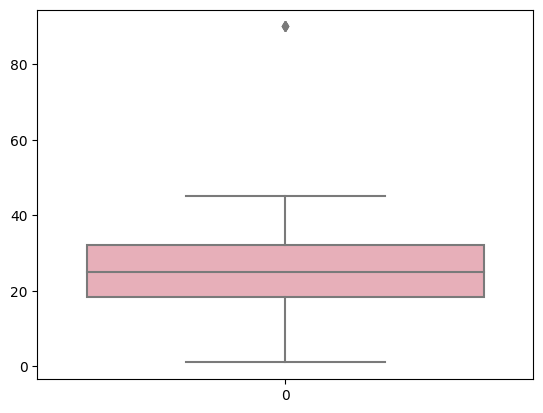

In [13]:
#Check outliers of time_spent
sns.boxplot(df['time_spent'],color='#F0A6B3')
#The graph shows an outlier that is above 80, which seems abnormal.

In [14]:
# Find the highest entries
df['time_spent'].sort_values(ascending=False).head(10)

284     90.0
2833    90.0
3957    90.0
2494    90.0
2190    45.0
2195    45.0
3991    45.0
4680    45.0
3992    45.0
3997    45.0
Name: time_spent, dtype: float64

In [15]:
df.drop([284,2833,3957,2494], axis=0, inplace=True)
#Outliers dropped.

<Axes: >

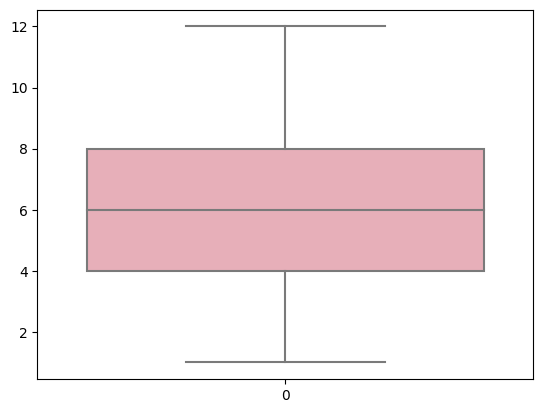

In [16]:
#Check outliers of time_spent
sns.boxplot(df['pages_visited'],color='#F0A6B3')
#The graph seems normal.

<Axes: >

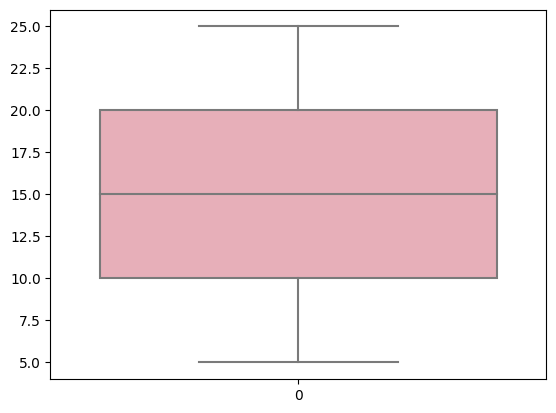

In [17]:
#Check outliers of time_spent
sns.boxplot(df['cart_items'],color='#F0A6B3')
#The graph seems normal.

<Axes: >

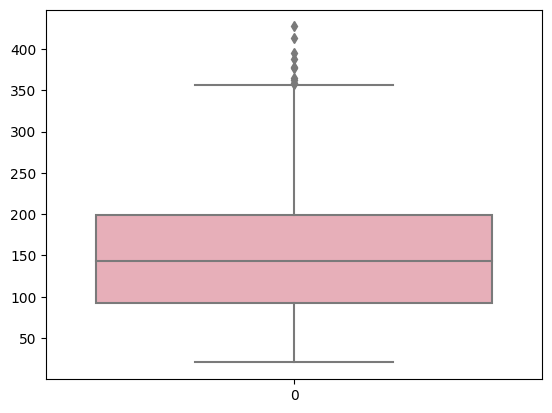

In [18]:
#Check outliers of time_spent
sns.boxplot(df['cart_value'],color='#F0A6B3')
#The graph seems to have some outliers, needed to further check the amount of outliers.

In [19]:
count = len(df[df['cart_value'] > 350])
count
# 14 outliers have been showed here, which may not influence the datasets if deleting them.

14

In [20]:
df = df[df['cart_value'] <= 350]
# Outlier deleted.

In [21]:
df.info()
# Data cleaned. 97.06% of data remained, which is good.

<class 'pandas.core.frame.DataFrame'>
Index: 4853 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4853 non-null   int64  
 1   age              4853 non-null   int64  
 2   sessions         4853 non-null   int64  
 3   time_spent       4853 non-null   float64
 4   pages_visited    4853 non-null   int64  
 5   cart_items       4853 non-null   int64  
 6   cart_value       4853 non-null   float64
 7   checkout_status  4853 non-null   int64  
 8   device           4853 non-null   object 
 9   location         4853 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 417.1+ KB


In [22]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,4853.000000,4853.00000,4853.000000,4853.000000,4853.000000,4853.000000,4853.000000,4853.000000,4853,4853
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2512,1024
mean,2505.919843,41.55883,5.024109,25.123864,5.773336,14.943746,148.806744,0.274469,NaN,NaN
std,1445.416203,14.04737,2.591133,9.651918,2.562438,6.042370,67.842873,0.446292,NaN,NaN
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1255.000000,29.00000,3.000000,18.290950,4.000000,10.000000,92.370000,0.000000,NaN,NaN
50%,2507.000000,42.00000,5.000000,25.053720,6.000000,15.000000,142.690000,0.000000,NaN,NaN
75%,3763.000000,54.00000,7.000000,31.981274,8.000000,20.000000,197.880000,1.000000,NaN,NaN


Question 2:
My data cleaning process includes checking and dropping null values, handling outliers, and verifying the accuracy of categorical data. Missing data have been deleted due to their small percentage, which will not significantly impact the entire dataset. Outliers have also been removed due to their rarity. As a result, 97.06% of the data remained, which is ideal for analysis. Additionally, I compared the description table before and after the data cleaning process and observed subtle changes. This confirms that deleting null data and outliers during the cleaning process was safe and did not affect the integrity of the data for analysis.

In [23]:
#Question 1:
from scipy.stats import pearsonr

In [24]:
checkout_status = df['checkout_status']
time_spent = df['time_spent']
pages_visited = df['pages_visited']
cart_items = df['cart_items']
cart_value = df['cart_value']
age = df['age']

In [25]:
corr_time_spent = pearsonr(checkout_status, time_spent)[0]
corr_pages_visited = pearsonr(checkout_status, pages_visited)[0]
corr_cart_items = pearsonr(checkout_status, cart_items)[0]
corr_cart_value = pearsonr(checkout_status, cart_value)[0]
corr_age = pearsonr(checkout_status, age)[0]

In [26]:
p_value_time_spent = pearsonr(checkout_status, time_spent)[1]
p_value_pages_visited = pearsonr(checkout_status, pages_visited)[1]
p_value_cart_items = pearsonr(checkout_status, cart_items)[1]
p_value_cart_value = pearsonr(checkout_status, cart_value)[1]
p_value_age = pearsonr(checkout_status, age)[1]

In [27]:
print("Correlation - Time Spent:", corr_time_spent)
print("P-value - Time Spent:", p_value_time_spent)

print("Correlation - Pages Visited:", corr_pages_visited)
print("P-value - Pages Visited:", p_value_pages_visited)

print("Correlation - Cart Items:", corr_cart_items)
print("P-value - Cart Items:", p_value_cart_items)

print("Correlation - Cart Value:", corr_cart_value)
print("P-value - Cart Value:", p_value_cart_value)

print("Correlation - Age:", corr_age)
print("P-value - Age:", p_value_age)

Correlation - Time Spent: 0.3947680221582001
P-value - Time Spent: 1.0074415995349688e-180
Correlation - Pages Visited: 0.36403201920226175
P-value - Pages Visited: 5.577783736219361e-152
Correlation - Cart Items: -0.0862160904193364
P-value - Cart Items: 1.790346463682213e-09
Correlation - Cart Value: -0.07521799156704123
P-value - Cart Value: 1.5541197021019357e-07
Correlation - Age: -0.014180954995990187
P-value - Age: 0.32330458932366624


Question 1:

Time Spent:
Correlation: 0.3948
P-value: 1.0074e-180
The positive correlation coefficient (0.3948) suggests that there is a moderate positive relationship between the time spent by users and their likelihood of completing checkouts. The very low p-value (1.0074e-180) indicates that this correlation is statistically significant.

Pages Visited:
Correlation: 0.3640
P-value: 5.5778e-152
Similar to time spent, the positive correlation coefficient (0.3640) indicates a moderate positive relationship between the number of pages visited and checkout completion. The extremely low p-value (5.5778e-152) suggests that this correlation is statistically significant.

Cart Items:
Correlation: -0.0862
P-value: 1.7903e-09
The negative correlation coefficient (-0.0862) suggests a weak negative relationship between the number of items in the cart and checkout completion. The p-value (1.7903e-09) indicates that this correlation is statistically significant, but the effect size is relatively small.

Cart Value:
Correlation: -0.0752
P-value: 1.5541e-07
Similarly to cart items, the negative correlation coefficient (-0.0752) indicates a weak negative relationship between the total value of items in the cart and checkout completion. The p-value (1.5541e-07) suggests that this correlation is statistically significant, but the effect size is relatively small.

Age:
Correlation: -0.0142
P-value: 0.3233
The correlation coefficient is close to zero, suggesting a very weak or negligible relationship between age and checkout completion. Additionally, the relatively high p-value indicates that this correlation is not statistically significant.

In summary, users who spend more time on the website and visit more pages may be more likely to complete checkouts.
The number of items in the cart and the total value of items have a negative relationship with checkout completion, suggesting that users with fewer items or lower cart values are more likely to complete checkouts. Age, on the other hand, does not seem to have a significant impact on checkout completion. 

However, correlation is not causation, therefore, we need to go deeper investigaton.

In [159]:
df

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
...,...,...,...,...,...,...,...,...,...,...
4995,4996,48,8,45.000000,11,25,278.92,0,Tablet,Location 5
4996,4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2
4997,4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4
4998,4999,58,1,45.000000,11,24,203.42,0,Desktop,Location 5


In [43]:
# Introduce a new attribut called time_spent_per_page
df['time_spent_per_page'] = df['time_spent'] / df['pages_visited']

<Axes: xlabel='time_spent_per_page', ylabel='checkout_status'>

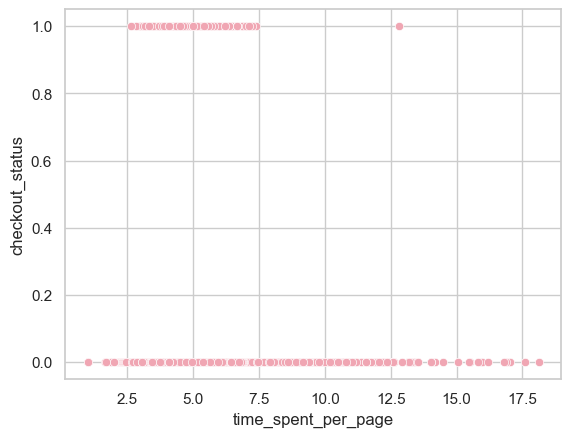

In [51]:
#Plot to see the relationship of time spent per page and checkout status.
sns.set(style="whitegrid")
sns.scatterplot(data=df,x='time_spent_per_page',y='checkout_status', color='#F0A6B3')

In [63]:
checkout = df[df['checkout_status'] == 1]
time_spent_per_page_checkout = checkout['time_spent_per_page'].describe()

print("time spent per page (checkout):", time_spent_per_page_checkout)

time spent per page (checkout): count    1332.000000
mean        4.408593
std         0.730114
min         2.652006
25%         3.932082
50%         4.303844
75%         4.771786
max        12.795941
Name: time_spent_per_page, dtype: float64


In [62]:
non_checkout = df[df['checkout_status'] == 0]
time_spent_per_page_non_checkout = non_checkout['time_spent_per_page'].describe()

print("time spent per page (non-checkout):", time_spent_per_page_non_checkout)

time spent per page (non-checkout): count    3521.000000
mean        4.811084
std         1.710011
min         1.000000
25%         3.863468
50%         4.417436
75%         5.166980
max        18.124745
Name: time_spent_per_page, dtype: float64


In [ ]:
p_value_time_spent = pearsonr(checkout_status, )[1]
corr_time_spent = pearsonr(checkout_status, time_spent)[0]
print("Correlation - Age:", corr_age)
print("P-value - Age:", p_value_age)

The mean and median of time spent per page of non checkout status and checkout status has similar number (around 4-5 minutes) , which indicates customers will likely to checkout in 4-5 minutes. Also, the 75% quantile number and max number shows larger in non checkout customers. This roughly recommends to improve and simplify the user experience in shopping such as implementing one-click purchase.

In [71]:
# Check the cart value and the checkout status.
checkout_c = df[df['checkout_status'] == 1]
cart_value_checkout = checkout['cart_value'].describe()

print("cart value (checkout):", cart_value_checkout)

cart value (checkout): count    1332.000000
mean      140.510871
std        47.683980
min        43.220000
25%       102.810000
50%       135.830000
75%       174.365000
max       313.760000
Name: cart_value, dtype: float64


In [73]:
# Check the cart value and the checkout status.
non_checkout_c = df[df['checkout_status'] == 0]
cart_value_non_checkout = non_checkout['cart_value'].describe()

print("cart value (non checkout):", cart_value_non_checkout)

cart value (non checkout): count    3521.000000
mean      151.945087
std        73.815183
min        20.410000
25%        85.550000
50%       146.810000
75%       209.410000
max       346.810000
Name: cart_value, dtype: float64


This clearly shows a higher cart value may lead to less checkout rate, which indicating a lower checkout value are more easily accepted by customers to checkkout. This also can be recommend ffer Discounts or Promotions. Implement targeted discounts or promotions to incentivize customers to complete their purchase. This can include percentage discounts, buy-one-get-one (BOGO) offers, free shipping, or limited-time promotions. Clearly communicate the discounts on the website, in emails, or through targeted advertising to encourage customers to take advantage of the lowered cart value.

<Axes: xlabel='location', ylabel='Count'>

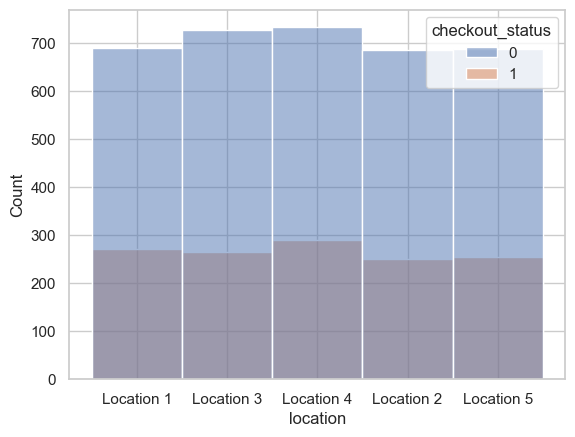

In [83]:
# Check if the location has relationship with the checkout rate.
sns.set(style="whitegrid")
sns.histplot(data=df, x='location', hue='checkout_status', color='#F0A6B3', edgecolor='white')

